In [1]:
import os
import sys
import numpy as np
import pandas as pd
import pickle
import random
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import hinge_loss
from AEspeech import AEspeech
import pdb
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import joblib

In [6]:
PATH=os.getcwd()

mod="CAE"
rep='spec'
utter='pataka'

pc_data=pd.read_pickle(PATH+"/pdSpanish/classResults/svm/params/"+mod+'_'+utter+'_'+rep+'_pc.pkl')
results_path=PATH+"/pdSpanish/classResults/svm/"+mod+'_'+rep+'Results.pkl'
results=pd.read_pickle(results_path)

In [7]:
UTTERS=['pataka']
# UTTERS=['pataka','kakaka','pakata','papapa','petaka','tatata']
for utter in UTTERS:
    grid=joblib.load(PATH+"/pdSpanish/classResults/svm/params/"+mod+'_'+utter+'_'+rep+'Grid.pkl')
    print("The best parameters are for utterance: %s are %s with a score of %0.2f"
      % (utter, grid.best_params_, grid.best_score_))

The best parameters are for utterance: pataka are {'C': 1.1787686347935867e-09, 'degree': 3, 'gamma': 1.8329807108324374, 'kernel': 'poly'} with a score of 0.80


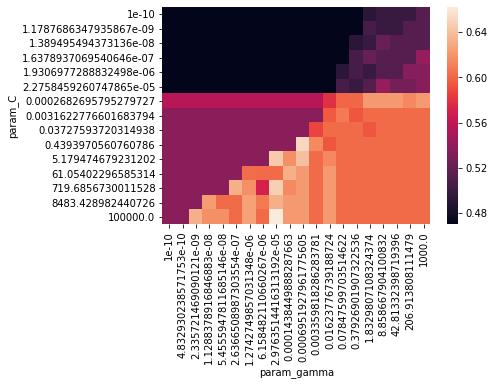

In [8]:
import seaborn as sns
pvt = pd.pivot_table(pd.DataFrame(grid.cv_results_).round(2),values='mean_test_score', index='param_C',columns='param_gamma')
ax = sns.heatmap(pvt)

Text(0, 0.5, 'cumulative explained variance')

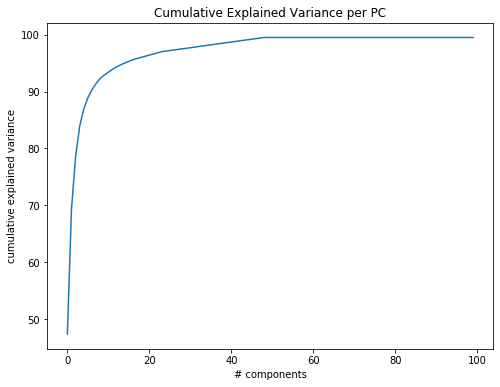

In [5]:
fig,ax=plt.subplots(1,1,figsize=(8, 6))
ax.plot(pc_data.loc['pc_var']['pataka'])
plt.title("Cumulative Explained Variance per PC")
ax.set_xlabel("# components")
ax.set_ylabel("cumulative explained variance")
# ax.set_xlim([-.05,1.05])
# ax.set_ylim([0,1])

In [ ]:
"""Plot ROC curve for speech utterance"""
roc_dic={thrsh*.01:{'tp':0,'fp':0,'tn':0,'fn':0} for thrsh in np.arange(101)}
tprs=[]
fprs=[]

for itr,(index, col) in enumerate(results.items()):
    if col.name==utter:
        tprs=[]
        fprs=[]
        for thresh in roc_dic.items():
            thr=thresh[0]
    #         if col.name==utter:
    #             for epoch in range(n_epochs):
            for key,value in enumerate(list(results[index]['tstSpk_data'].values())):
                if value == {}:
                    value=0
                if key<50 and value>thr:
                    roc_dic[thr]['tp']+=1
                if key<50 and value<thr:
                    roc_dic[thr]['fn']+=1
                if key>=50 and value>thr:
                    roc_dic[thr]['fp']+=1
                if key>=50 and value<thr:
                    roc_dic[thr]['tn']+=1

            tprs.append(roc_dic[thr]['tp']/(roc_dic[thr]['tp']+roc_dic[thr]['fn']+10e-6))
            fprs.append(roc_dic[thr]['fp']/(roc_dic[thr]['fp']+roc_dic[thr]['tn']+10e-6))

tprs=np.sort(tprs)
fprs=np.sort(fprs)

fig,ax=plt.subplots(1,1,figsize=(8, 6))
plt.plot(np.sort(fprs),np.sort(tprs))
plt.title("PD v. HC ROC: "+mod+", "+rep+", "+utter+"\n AUC: "+str(np.round(metrics.auc(fprs, tprs),3)))
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_xlim([-.05,1.05])
ax.set_ylim([0,1])

In [ ]:
"""Plot of ROC curve for all speech utterances"""
# roc_dic={thrsh*.01:{'tp':0,'fp':0,'tn':0,'fn':0} for thrsh in np.arange(101)}
# tprs=[]
# fprs=[]
# fig,axs=plt.subplots(2,3,figsize=(12, 8))
# axs = axs.ravel()

# for itr,(index, col) in enumerate(results.items()):
#     if col.name==utter:
#         tprs=[]
#         fprs=[]
#         ax=axs[itr]
#         for thresh in roc_dic.items():
#             thr=thresh[0]
#     #         if col.name==utter:
#     #             for epoch in range(n_epochs):
#             for key,value in enumerate(list(results[index]['tstSpk_data'].values())):
#                 if value == {}:
#                     value=0
#                 if key<50 and value>thr:
#                     roc_dic[thr]['tp']+=1
#                 if key<50 and value<thr:
#                     roc_dic[thr]['fn']+=1
#                 if key>=50 and value>thr:
#                     roc_dic[thr]['fp']+=1
#                 if key>=50 and value<thr:
#                     roc_dic[thr]['tn']+=1

#             tprs.append(roc_dic[thr]['tp']/(roc_dic[thr]['tp']+roc_dic[thr]['fn']+10e-6))
#             fprs.append(roc_dic[thr]['fp']/(roc_dic[thr]['fp']+roc_dic[thr]['tn']+10e-6))

#         ax.plot(np.sort(fprs),np.sort(tprs))
#         ax.set_title("PD v. HC ROC: "+mod+", "+rep+", "+index+"\n AUC: "+str(np.round(metrics.auc(fprs, tprs),3)))
#         ax.set_xlabel("FPR")
#         ax.set_ylabel("TPR")
#         ax.set_xlim([-.05,1.05])
#         ax.set_ylim([0,1])
#         plt.tight_layout()
    

In [ ]:
# print('MEAN % of FRAMES CLASSIFIED PD')
# for key,item in results.items():
#     print(key+' - ', 'pd: '+str(np.round(np.mean([itm for k,itm in item['tstSpk_data'].items() if k<50]),3)), 'hc: '+str(np.round(np.mean([itm for k,itm in item['tstSpk_data'].items() if k>=50]),3)))


In [ ]:
# for key,item in results.items():
#     print(key,item['test_acc'])

In [ ]:
# n_epochs=results.iloc[-1].name[0]
# utters=['pataka','kakaka','pakata','papapa','petaka','tatata']

# col_res={ut:{key:0 for key in results.loc[0].index} for ut in utters}

# for index, col in results.items():
#     col_res[col.name]['tstSpk_data']={num:0 for num in np.arange(100)}
#     col_res[col.name]['test_accPerSpk']=0

#     for epoch in range(n_epochs):
#         col_res[col.name]['train_loss']+=col.loc[epoch]['train_loss']*(1/n_epochs)
#         col_res[col.name]['test_loss']+=col.loc[epoch]['test_loss']*(1/n_epochs)
#         col_res[col.name]['train_acc']+=col.loc[epoch]['train_acc']*(1/n_epochs)
#         col_res[col.name]['test_acc']+=col.loc[epoch]['test_acc']*(1/n_epochs)

#         for key,value in col.loc[epoch]['tstSpk_data'].items():   
# #             if value>=.5:
# #                 col_res[col.name]['test_accPerSpk']+=(1/(100*n_epochs))       
#             col_res[col.name]['tstSpk_data'][key]+=value*(1/n_epochs)
    